# Chunk Podcast into audio files

## read data

In [1]:
data_path = "../data/s2e1.mp4"

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y, sr = librosa.load(data_path)
print(sr)

C:\Users\DionysNabarro\AppData\Local\Temp\ipykernel_84612\2381899857.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(data_path)
C:\Users\DionysNabarro\Documents\Work\bench\holy_hack\New folder\holy-hack-2024-ai-workshop\.venv\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


22050


In [26]:
y_resampled = librosa.resample(y, orig_sr=22050, target_sr=16000)

In [29]:
import soundfile as sf
sf.write('audio_s2e1.mp3', y_resampled, 16000)

In [4]:
n_seconds = 120

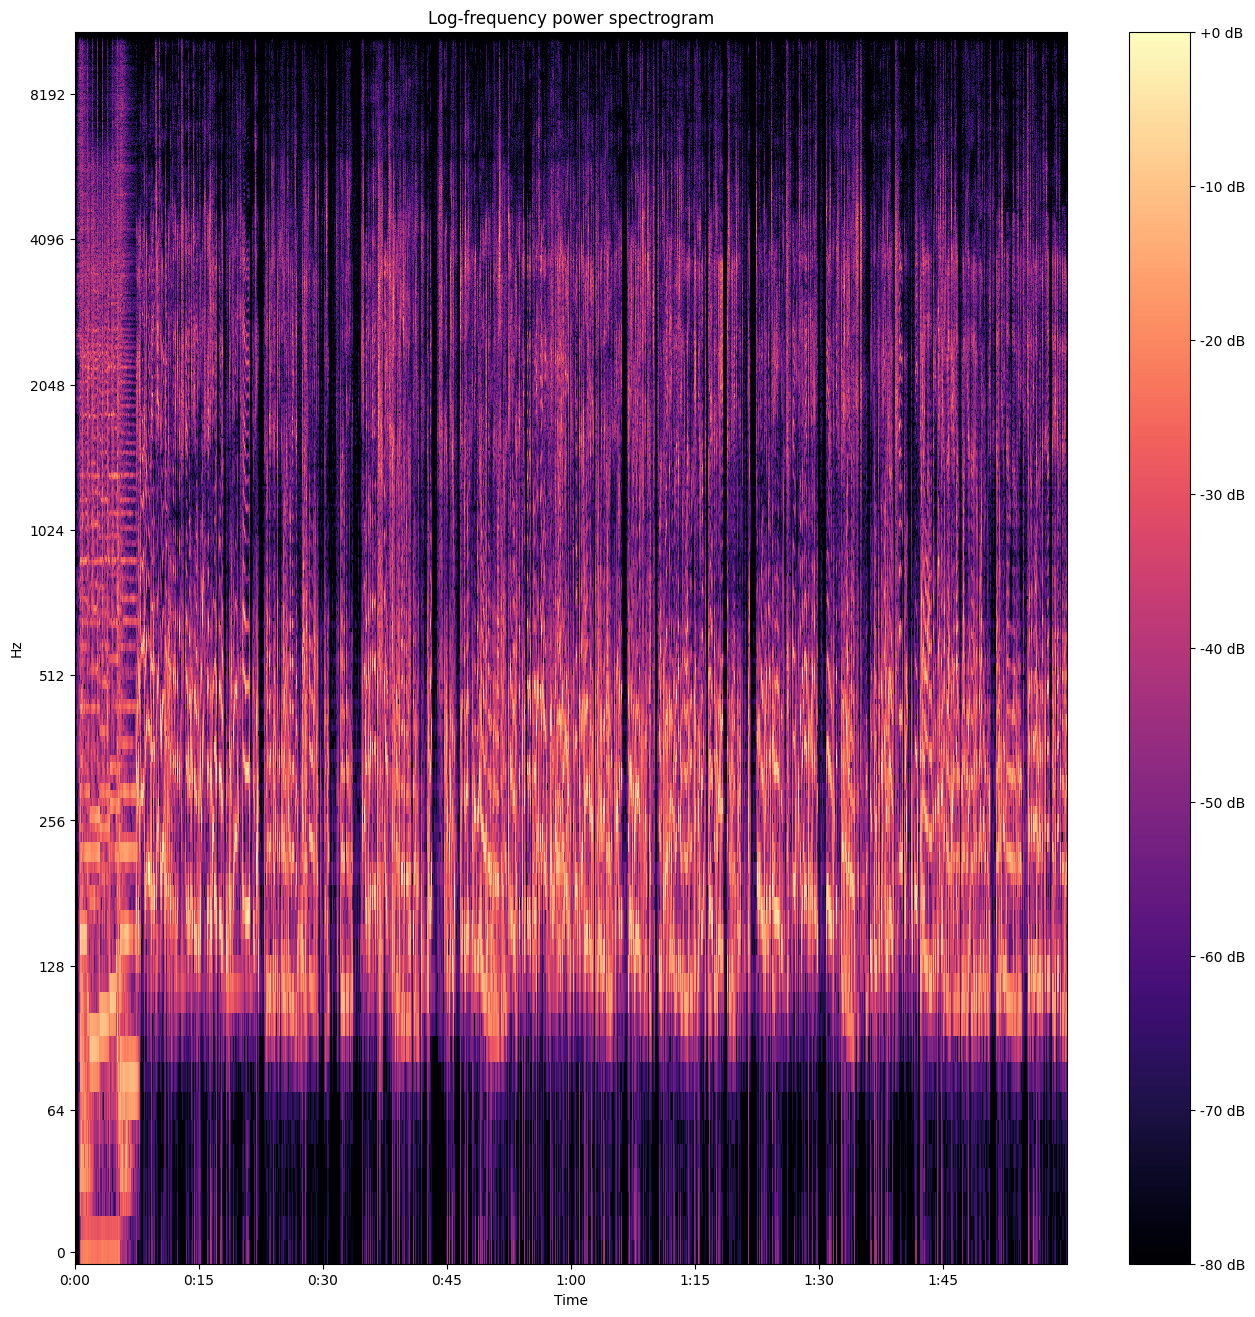

In [5]:
fig, ax = plt.subplots(figsize=(16,16));
hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y[:n_seconds*sr], hop_length=hop_length)),
                            ref=np.max)
img=librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.set(title='Log-frequency power spectrogram')
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

[Text(0.5, 1.0, 'log Power spectrogram')]

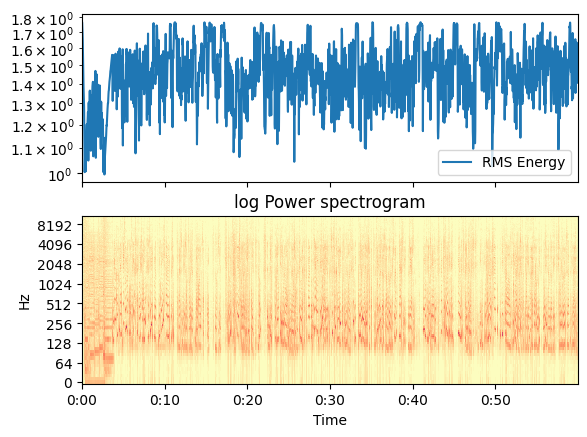

In [8]:
rms = librosa.feature.rms(S=D)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [11]:
import IPython
IPython.display.Audio(y[:n_seconds*sr], rate=sr)

In [19]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

sound = AudioSegment.from_file(data_path, format="mp4")

-1.027299

In [24]:
sound

AttributeError: 'AudioSegment' object has no attribute 'shape'

In [10]:

chunks = split_on_silence(
    sound,

    # split on silences longer than 1000ms (1 sec)
    min_silence_len=1000,

    # anything under -16 dBFS is considered silence
    silence_thresh=-16, 

    # keep 200 ms of leading/trailing silence
    keep_silence=200
)

In [11]:
len(chunks)

458

In [15]:
chunks[3]

In [ ]:
# now recombine the chunks so that the parts are at least 90 sec long
target_length = 90 * 1000
output_chunks = [chunks[0]]
for chunk in chunks[1:]:
    if len(output_chunks[-1]) < target_length:
        output_chunks[-1] += chunk
    else:
        # if the last output chunk is longer than the target length,
        # we can start a new one
        output_chunks.append(chunk)

# now your have chunks that are bigger than 90 seconds (except, possibly the last one)